# Tutorial for fitting sinusoidal nonhomogeneous Poisson processes (NHPPs)

This tutorial demonstrates how to fit to data the sinusoidal NHPP model with arrival rate
\begin{equation}
\lambda(t)=c_{0}+\sum_{k=1}^{p}c_{k}\cos(2\pi\nu_{k}t+\phi_{k})
\end{equation}
from the paper [Can customer arrival rates be modelled by sine waves?](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3125120) (forthcoming joint issue in *Service Science* and *Stochastic Systems*).

The frequencies $\nu_1,\cdots,\nu_p$ can take on any values in a pre-specified band $[-B,+B]$, and $\phi_k \in [0,2\pi)$ and $c_k$ are respectively the phase and amplitude of the $k$-th sinusoid. The number of sinusoids $p$ will be estimated from data.

The details of the estimation procedure is described in Appendix A of the paper. In turn, the procedure is a simpler variant of the one proposed in [Super-resolution estimation of cyclic arrival rates](https://projecteuclid.org/journals/annals-of-statistics/volume-47/issue-3/Super-resolution-estimation-of-cyclic-arrival-rates/10.1214/18-AOS1736.full) (*Annals of Statistics* 2019).

In [1]:
import pandas as pd
import numpy as np
import help_funcs
import matplotlib.pyplot as plt

Read in a simulated arrivals dataset consisting of arrival timestamps over the course of 365 days ($T=365$). The data is generated according to the NHPP model in Section 3 of the paper, with $\alpha = 3$. To keep this illustrative dataset to a reasonable size, we scale down the arrival rate used in the paper by a factor of 10 in order to reduce the number of simulated arrivals.  

In [2]:
arrivals = pd.read_csv('simulated_arrivals.csv')
arrivals.head()

,arrival_time_in_days
0,0.002607
1,0.003344
2,0.003906
3,0.005658
4,0.008437


Use the `center_periodogram()` function from the `help_funcs` module to identify the frequencies $\nu_1,\cdots,\nu_p$ in the arrivals data. This corresponds to equation (12) and Figure 4 in Appendix A of the paper.


The `center_periodogram()` function accepts the following arguments:
- `T`: Length of the observation window ($T=365$ days in the example)
- `a`: Average arrival rate, `obs`/`T`
- `obs`: The arrival timestamps as a $1\times N$ numpy array
- `freq_grid`: The grid of frequencies used to sample the periodogram. The spacing of the grid needs to be asymptotically smaller than order $1/T$. In this example we use a resolution of $1/(T\log T)$

In [3]:
obs = arrivals.arrival_time_in_days.values.reshape((1, -1))
T = 365
a = obs.size / T

max_freq = 6 #in this example, this means a maximum frequency of 6 cycles per day
freq_resolution = T*np.log(T)
freq_grid = np.linspace( 0, max_freq, num=int( max_freq*freq_resolution ) ).reshape((1, -1))

The periodogram may take some time to run, especially for large datasets.

In [4]:
windowed_periodogram = help_funcs.center_periodogram(T, obs, freq_grid, a)

Graph the periodogram to visualize the frequencies present in the arrivals data, and their amplitudes.

Text(0, 0.5, 'Amplitude')

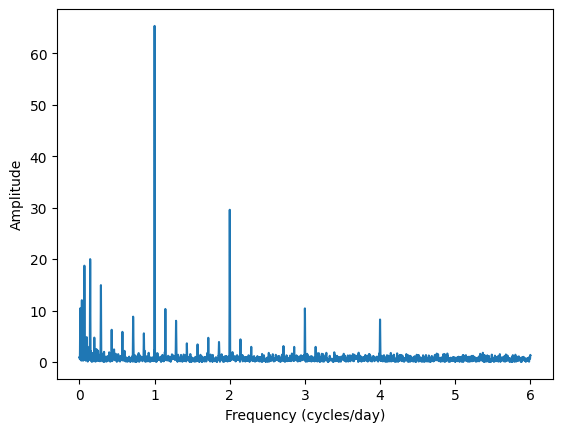

In [5]:
plt.plot(freq_grid.flatten(), windowed_periodogram.flatten())

plt.xlabel("Frequency (cycles/day)")
plt.ylabel("Amplitude")

Ignore frequencies with amplitudes below a certain noise threshold $\tau$. This represents the level of statistical noise in the frequency domain. $\tau$ can often be visually inspected. In the example above we pick $\tau = 6$.

For frequencies with amplitudes larger than $\tau$, we use the `lse_time_cont()` function from the `help_funcs` module to fit the amplitudes $c_k$'s and phases $\phi_k$'s.

In [6]:
tau = 6

constant, fitted_params = help_funcs.lse_time_cont(
    obs, windowed_periodogram, freq_grid, tau, T
)

The estimated constant is:

In [7]:
print(constant)

[353.01163721]


The remainder of the estimated parameters are:

In [8]:
fitted_params

,freq,amplitude,phase
0,0.002107,287.677375,-0.720737
1,0.004215,275.147334,-1.456613
2,0.006322,264.298520,0.969385
3,0.008430,287.699738,0.242512
4,0.010537,2023.711872,-0.511377
5,0.010682,1875.612506,-0.360270
6,0.012645,46.699304,-1.281902
7,0.032046,46.161023,-0.384892
8,0.043192,26.348176,1.474984
9,0.065485,73.107754,0.113030
